# The Relationship Between GDP and Housing Affordability: An Analysis

This analysis explores the relationship between Real Gross Domestic Product and the Median Multiple, a key metric of housing affordability that measures the ratio of median house price to median household income. We seek to determine whether a widely accepted measure of economic health correlates with improved housing affordability for the general population.

One might reasonably expect that robust economic growth, as measured by GDP, would translate to enhanced quality of life for citizens, including greater access to affordable housing. Housing affordability represents a fundamental component of wellbeing and social stability in modern societies. Its significance extends beyond shelter alone—home ownership has long been associated with achieving the "American Dream" and serves as a gateway to middle-class status. As Brent Never, Associate Dean for Budget and Finance at the University of Missouri Kansas City, articulates: "When you think about what the middle class means conceptually, it means being able to do things like own your home, send your kids to college, be able to invest in your retirement." By this standard, housing affordability constitutes a critical indicator of socioeconomic opportunity.

The implications of this relationship extend far beyond individual financial concerns. Growing housing unaffordability, despite economic growth, raises profound questions about equity and social cohesion. William A. Galston addresses this in "The Enduring Vulnerability of Liberal Democracy" (2020), noting: "Yet even regulated markets produce inequality, and inequality beyond a certain (albeit hard to specify) point becomes a problem for democracy. Aristotle saw a link between a strong middle class and a stable constitutional order, as did James Madison. Contemporary political science affirms this connection."

GDP merits particular attention in this analysis due to its ubiquitous role as the premier indicator of economic health. Government officials, economists, financial institutions, and media outlets consistently reference GDP growth as evidence of economic prosperity. According to the International Monetary Fund, "Economists use many acronyms. One of the most common is GDP, which stands for gross domestic product. It is often cited in newspapers, on the television news, and in reports by governments, central banks, and the business community. It has become widely used as a reference point for the health of national and global economies. When GDP is growing, especially if inflation is not a problem, workers and businesses are generally better off than when it is not." However, questions remain about whether this widely-accepted measure of economic success adequately reflects improvements in living standards and housing affordability for the average citizen.

At this point, I invite readers to consider the potential relationship between economic growth and housing affordability. If one were to predict this relationship, what might it look like? Does increased productivity, as measured by GDP, encourage investment in population needs, innovation and efficiencies that ultimately reduce housing costs? Alternatively, might there be a moderate or even strong correlation with decreasing affordability as wealth creation drives property values upward? These questions lie at the heart of understanding whether our conventional economic metrics align with everyday quality of life concerns, and I hope you find the following analysis as compelling and thought-provoking as I have found it to be.

In the following sections, we will examine historical data on GDP growth alongside trends in the Median Multiple in the United States between the years 1961-2022, analyze potential correlations between these metrics, and explore the implications for economic policy and societal wellbeing. This analysis will help determine whether our conventional measures of economic success align with or diverge from this fundamental aspect of quality of life.



Dataset and Rationale

Data Sources
This analysis utilizes authoritative economic data from the Federal Reserve Bank of St. Louis, focusing exclusively on United States metrics. The following datasets were incorporated:

- Real Gross Domestic Product (Quarterly: 1947-01-01 to 2024-10-01)
- Federal Funds Rate (Monthly: 1954-07-01 to 2025-02-01)
- Consumer Price Index for All Urban Consumers (Monthly: [date range needed])
- US Unemployment Rate (Monthly: 1947-01-01 to 2025-02-01)
- Median Home Price (Quarterly: 1963-01-01 to 2024-10-01)
- Real Median Family Income in the United States (Annual: 1953 to 2023)
* Links can be found in the citations at the bottom of the report.

Data Preprocessing
The data preparation process addressed several alignment challenges:

1. Temporal alignment: All datasets were trimmed to ensure consistent beginning and end dates.
2. Reporting period adjustments: Variables such as income (which represent prior-period activity) were realigned to correspond with corresponding measurements.
3. Frequency standardization: Annual metrics such as median income were converted to quarterly measurements using appropriate averaging techniques to enhance analytical granularity.
4. Lag variable creation: The Federal Funds Rate was transformed into multiple lagged variables (6, 12, and 18 months) to capture delayed economic intervention effects, though these ultimately had no impact on the final analysis.

Primary Analytical Metric
Of particular importance is the Median Multiple metric, a housing affordability indicator calculated by dividing median home price by median household income. This established economic measure provides insight into housing affordability trends.

As noted in the Demographia 10th Annual International Housing Survey (2024): "Demographia International Housing Affordability uses a price-to-income ratio, the 'median multiple' to rate middle-income housing affordability. The median multiple is a price-to-income ratio of the median house price divided by the gross median household income. Price-to-income ratios have been widely used, such as by the World Bank, the United Nations, the Organization for International Cooperation and Development (OECD), the Joint Center for Housing Studies at Harvard University and others. Median price and income measures better reflect the economic impacts on middle-income and lower-income households, as opposed to averages, which are skewed upward by the inclusion of the highest incomes and prices."

Analytical Approach
The Median Multiple serves as the response variable in this analysis, with other economic indicators functioning as predictor variables. Multiple linear regression models were developed, with only the most statistically significant relationships presented in the main analysis. A random forest classification model was created to assess predictive capacity by affordability class.

In [1]:
# Standard imports and abbreviations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns


# Tools and metrics for linear regression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# from scipy.interpolate import UnivariateSpline

# Needed to provide type hints for functions passed as arguments
from typing import Callable

In [2]:
# Read in Median Home Price

# Read the CSV file into a DataFrame
home_price_df = pd.read_csv('/Users/douglas/VS_Code/1963-01-01_Med_Home_Price.csv')

# Rename columns for easier comprehension
home_price_df = home_price_df.rename(columns={"MSPUS": "median_home_price"})

home_price_df.head()

,observation_date,median_home_price
0,1963-01-01,17800
1,1963-04-01,18000
2,1963-07-01,17900
3,1963-10-01,18500
4,1964-01-01,18500


In [3]:
# Verify no missing data missing data
# home_price_df.isna().sum() 
home_price_df.isnull().sum() 

# Count the number of unique values
home_price_df.nunique()

observation_date     248
median_home_price    226
dtype: int64

Observations regarding Median Home Price Data:
248 rows representing observations of quarterly data between 1963-01-01 - 2024-10-01

In [4]:
# Loading income data and inspection

income_df = pd.read_csv('/Users/douglas/VS_Code/MedianUS_income1953.csv')
# income_df.info

# create a copy of raw data
income_copy = income_df
home_price_copy = home_price_df

# rename column for easier interpretability
income_copy = income_copy.rename(columns={"MEFAINUSA672N": "median_income"})

# income_copy.dtypes
# income_copy.head

# Count missing data
# income_copy.isna().sum() 
income_copy.isnull().sum() 

# Count the number of unique values
income_copy.nunique()

home_price_copy.head


<bound method NDFrame.head of     observation_date  median_home_price
0         1963-01-01              17800
1         1963-04-01              18000
2         1963-07-01              17900
3         1963-10-01              18500
4         1964-01-01              18500
..               ...                ...
243       2023-10-01             423200
244       2024-01-01             426800
245       2024-04-01             414500
246       2024-07-01             415300
247       2024-10-01             419200

[248 rows x 2 columns]>

Observations regarding Median Income Data:
71 rows representing Yearly intervals of Income Data from 1953-01-01 - 2023-01-01
In order to be able to combine these datasets I either have to turn the annual data into quarterly data or turn the quarterly data into annual data. 
Breaking the annual income data into quarters will provide more records and can lead to more granularity.
I will also need to ensure that the data is from the same time interval. Records will need to be trimmed from the begining of the income data and the end of the home price data in order to create a matching interval.

The first date in the home price dataset is 1963-01-01 and the final date in the income data is 2023-01-01. The income data is given in January. Upon researching documentation on the FRED website and careful reflection I will be treating this data as representing the income of the previous year. This is most likely the way the income is reported given that the associated date is January 1st and the associated years income has not been collected at this timepoint.

Therefore I trim the data to match the interval between 1963-01-01 and 2023-01-01. I also move the income data back by 1 year and average it to match the quarterly reporting of home prices.

In [5]:
# can add this to other code blocks to declutter
# Change observation_dates to datetime object to prepare for analysis


income_copy['observation_date'] = pd.to_datetime(income_copy['observation_date'])
home_price_copy['observation_date'] = pd.to_datetime(home_price_copy['observation_date'])
income_copy.dtypes
# home_price_copy.dtypes


observation_date    datetime64[ns]
median_income                int64
dtype: object

In [6]:
# Trim to the correct time interval

income_copy = income_copy[income_copy['observation_date'] >= '1963-01-01']

home_price_copy = home_price_copy[home_price_copy['observation_date'] <= '2023-01-01']

# home_price_copy.head
# income_copy.head

In [7]:
# If the median income data was expanded from yearly intervals into quarterly we 
# would anticipate the same number of rows. 
print(61*4) # result = 244 instead of 241

# Need to investigate why
# print(/f'Difference between 2023 and 1963:' 2023-1963)

print(f'Difference between 2023 and 1962: {2023 - 1962}')

244
Difference between 2023 and 1962: 61


In [8]:
# Extract year from the observation_date column
home_price_copy['year'] = home_price_copy['observation_date'].dt.year

# Group by year and count observations
observations_per_year = home_price_copy.groupby('year').size()

print(observations_per_year)

# Results indicate one observation in 2023. This represents the yearly income of 2022
# which works out fine for the purposes of this analysis due to it being used to calculate the income in 2022

year
1963    4
1964    4
1965    4
1966    4
1967    4
       ..
2019    4
2020    4
2021    4
2022    4
2023    1
Length: 61, dtype: int64


/var/folders/4_/dbg0kzhn7354xv35_by_4slr0000gn/T/ipykernel_2575/548841360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_price_copy['year'] = home_price_copy['observation_date'].dt.year


At this point the Median Multiple needs to be engineered with our dataset. 

This will involve accounting for the fact that the median home price values are given on dates that correspond to the first date in a Quarter but are calculated with the previous Quarters data. 
For instance an obervation date 2022-01-01 is calculated with data from 10-01-2021 through 12-31-2021. 
In addition to this the data for Median Income is given on the first of January of the following year. For example 2022-01-01 is the median income for 2021. 

In [9]:
# Convert to datetime # already done
# income_copy['observation_date'] = pd.to_datetime(income_copy['observation_date'])
# home_price_copy['observation_date'] = pd.to_datetime(home_price_copy['observation_date'])


# Apply quarter start to dates for proper grouping
income_copy['quarter_date'] = income_copy['observation_date'].dt.to_period('Q').dt.to_timestamp()

# Group by quarter and average
income_quarterly = income_copy.groupby('quarter_date')['median_income'].mean().reset_index()
income_quarterly = income_quarterly.rename(columns={'quarter_date': 'observation_date'})

# Shift by 1 year to match the year the income was made
income_quarterly['observation_date'] = income_quarterly['observation_date'] - pd.DateOffset(years=1)

# Merge with direction='nearest' to find best match
df_merged = pd.merge_asof(
    home_price_copy.sort_values("observation_date"),
    income_quarterly.sort_values("observation_date"),
    on="observation_date",
    direction='nearest'
)

# Calculate Median Multiple
df_merged["Median_Multiple"] = df_merged["median_home_price"] / df_merged["median_income"]

print(df_merged.tail(10))


    observation_date  median_home_price  year  median_income  Median_Multiple
231       2020-10-01             338600  2020        96430.0         3.511355
232       2021-01-01             355000  2021        96430.0         3.681427
233       2021-04-01             367800  2021        96430.0         3.814166
234       2021-07-01             395200  2021        96430.0         4.098310
235       2021-10-01             414000  2021       100800.0         4.107143
236       2022-01-01             413500  2022       100800.0         4.102183
237       2022-04-01             437700  2022       100800.0         4.342262
238       2022-07-01             438000  2022       100800.0         4.345238
239       2022-10-01             442600  2022       100800.0         4.390873
240       2023-01-01             429000  2023       100800.0         4.255952


In [10]:
df_merged['Median_Multiple'].describe()

count    241.000000
mean       1.767459
std        1.098784
min        0.332255
25%        0.734886
50%        1.688312
75%        2.784124
max        4.390873
Name: Median_Multiple, dtype: float64

In [11]:
# import predictor variable: Real GDP

# Read the CSV file into a DataFrame
GDP_df = pd.read_csv('/Users/douglas/VS_Code/GDPC1-2.csv')

# GDP_df.head   # Unitsin Billions of Chained 2017 Dollars
# create a copy to work with 

GDP_df_copy = GDP_df
# Rename column for readability
GDP_df_copy =GDP_df.rename(columns={"GDPC1": "real_GDP"})
GDP_df_copy.head


<bound method NDFrame.head of     observation_date   real_GDP
0         1947-01-01   2182.681
1         1947-04-01   2176.892
2         1947-07-01   2172.432
3         1947-10-01   2206.452
4         1948-01-01   2239.682
..               ...        ...
307       2023-10-01  22960.600
308       2024-01-01  23053.545
309       2024-04-01  23223.906
310       2024-07-01  23400.294
311       2024-10-01  23536.293

[312 rows x 2 columns]>

In [12]:

# Change observation_dates to datetime object to prepare for analysis
GDP_df_copy['observation_date'] = pd.to_datetime(GDP_df_copy['observation_date'])
# GDP_df_copy.dtypes

# Filter the data to match the existing time interval
GDP_df_copy = GDP_df_copy[(GDP_df_copy['observation_date'] >= '1963-01-01') & (GDP_df_copy['observation_date'] <= '2023-01-01')]
GDP_df_copy.head


<bound method NDFrame.head of     observation_date   real_GDP
64        1963-01-01   3893.482
65        1963-04-01   3937.183
66        1963-07-01   4023.755
67        1963-10-01   4050.147
68        1964-01-01   4135.553
..               ...        ...
300       2022-01-01  21903.850
301       2022-04-01  21919.222
302       2022-07-01  22066.784
303       2022-10-01  22249.459
304       2023-01-01  22403.435

[241 rows x 2 columns]>

In [13]:
# Explore the correlation between GDP and Median Multiple

# Select specific columns from df_merged
df_merged_filtered_1 = df_merged[['observation_date', 'Median_Multiple', 'year']] 

# View the correlation between Real GDP and Median Multiple
# Merge the selected columns on 'observation date'
# GDP_MM_Correlation_df = pd.merge(df_merged_filtered_1, GDP_df_copy, on='observation_date')

# remove the date and year prior to the correlation test...
# GDP_MM_Correlation_df2 = GDP_MM_Correlation_df.drop(columns=['observation_date', 'year'])

# print(GDP_MM_Correlation_df2)



# Consider updating to...

# Explore the correlation between GDP and Median Multiple

# Select specific columns from df_merged
df_merged_filtered = df_merged[['observation_date', 'Median_Multiple', 'year']]

# Merge the selected columns with GDP_df_copy on 'observation_date'
GDP_MM_Correlation_df = pd.merge(df_merged_filtered, GDP_df_copy, on='observation_date')

# Drop the 'observation_date' and 'year' columns before calculating the correlation
GDP_MM_Correlation_df = GDP_MM_Correlation_df.drop(columns=['observation_date', 'year'])

# Print the resulting DataFrame
print(GDP_MM_Correlation_df)


     Median_Multiple   real_GDP
0           0.334524   3893.482
1           0.338282   3937.183
2           0.336403   4023.755
3           0.334539   4050.147
4           0.334539   4135.553
..               ...        ...
236         4.102183  21903.850
237         4.342262  21919.222
238         4.345238  22066.784
239         4.390873  22249.459
240         4.255952  22403.435

[241 rows x 2 columns]


In [14]:
# df_merged_filtered.head() Used of MM over time chart

In [15]:
# Perform the test
correlation_matrix = GDP_MM_Correlation_df.corr()
print(correlation_matrix)

                 Median_Multiple  real_GDP
Median_Multiple         1.000000  0.990577
real_GDP                0.990577  1.000000


"The 2024 Demographia International Housing Affordability report uses the following affordability categories based on the median multiple for a given market"

Affordable: 3.0 and under |
Moderately Unaffordable 3.1 to 4.0 |
Seriously Unaffordable 4.1 to 5.0 |
Severely Unaffordable 5.1 to 8.9 |
Impossibly Unaffordable 9.0 and Over

In [16]:
# add code up create new column for affordability scale

In [17]:
GDP_MM_Correlation_df.head()

,Median_Multiple,real_GDP
0,0.334524,3893.482
1,0.338282,3937.183
2,0.336403,4023.755
3,0.334539,4050.147
4,0.334539,4135.553


In [18]:
# Run a Linear Model 

# Split data into training and testing sets
X = GDP_MM_Correlation_df[['real_GDP']]  # Ensure it's a DataFrame
Y = GDP_MM_Correlation_df['Median_Multiple']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

# Add constant for intercept in OLS regression
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)  

# Fit the model
smodel = sm.OLS(Y_train, X_train_sm).fit()

# Print summary of the model
print(smodel.summary())

# Make predictions on the test set
Y_pred = smodel.predict(X_test_sm)

# Evaluate the model on the test set
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error on Test Set: {mse}")
print(f"R-squared on Test Set: {r2}")

                            OLS Regression Results                            
Dep. Variable:        Median_Multiple   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     9657.
Date:                Fri, 07 Mar 2025   Prob (F-statistic):          7.66e-165
Time:                        21:08:18   Log-Likelihood:                 93.460
No. Observations:                 192   AIC:                            -182.9
Df Residuals:                     190   BIC:                            -176.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5873      0.026    -22.248      0.0

This model performed much better than I expected. The R-squared suggests that 98.2% of the variance in the median multiple can be explained by Real GDP. Note that Real GDP is inflation adjusted GDP so this is a change in actual affordability and is likely due to the devaluation of labor reletive to home values. The F-statistic is very high and the P-value is rounded down to 0 showing a significant effect on the Median Multiple. The Durbin-Watson at 2.230 suggests no strong auto correlation which is good due to time series elements. The high condition number suggests potential multicoliniarity. To address this I scaled the Real GDP predictor.

In [19]:
from sklearn.preprocessing import StandardScaler 

# Scaled model 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# add constant 
X_train_scaled_sm = sm.add_constant(X_train_scaled)
X_test_scaled_sm = sm.add_constant(X_test_scaled)

# Fit scaled model
smodel_scaled = sm.OLS(Y_train, X_train_scaled_sm).fit(cov_type="HC3")
print(smodel_scaled.summary())

# make predictions with scaled features
Y_pred_scaled = smodel_scaled.predict(X_test_scaled_sm)


                            OLS Regression Results                            
Dep. Variable:        Median_Multiple   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     6360.
Date:                Fri, 07 Mar 2025   Prob (F-statistic):          5.09e-148
Time:                        21:08:18   Log-Likelihood:                 93.460
No. Observations:                 192   AIC:                            -182.9
Df Residuals:                     190   BIC:                            -176.4
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7803      0.011    163.729      0.0

In [20]:
# # # Use pd.cut to create the Affordability_Rating column
# GDP_MM_Correlation_df['Affordability_Rating'] = pd.cut(
#      GDP_MM_Correlation_df['Median_Multiple'],
#      bins=[0, 3.0, 4.0, 5.0, float('inf')],
#      labels=['Affordable', 'Moderately_Unaffordable', 'Seriously_Unaffordable', 'Severely_Unaffordable'])

# # Display the first few rows to verify
# GDP_MM_Correlation_df.head() 

In [21]:
# Use pd.cut to create the Affordability_Rating column
GDP_MM_Correlation_df['Affordability_Rating'] = pd.cut(
     GDP_MM_Correlation_df['Median_Multiple'],
     bins=[0, 3.0, 4.0, float('inf')],
     labels=['Affordable', 'Moderately_Unaffordable', 'Seriously_Unaffordable'])

# note: this code leaves out higher levels of unaffordability classification 
# because they are not relevent to this analysis but it should be updated for additional/other data

# Display the first few rows to verify
GDP_MM_Correlation_df.head() 

,Median_Multiple,real_GDP,Affordability_Rating
0,0.334524,3893.482,Affordable
1,0.338282,3937.183,Affordable
2,0.336403,4023.755,Affordable
3,0.334539,4050.147,Affordable
4,0.334539,4135.553,Affordable


In [22]:
# Define custom colors for Affordability Rating with correct category names
colors = {
    'Affordable': 'green',
    'Moderately_Unaffordable': 'orange',
    'Seriously_Unaffordable': 'red'}

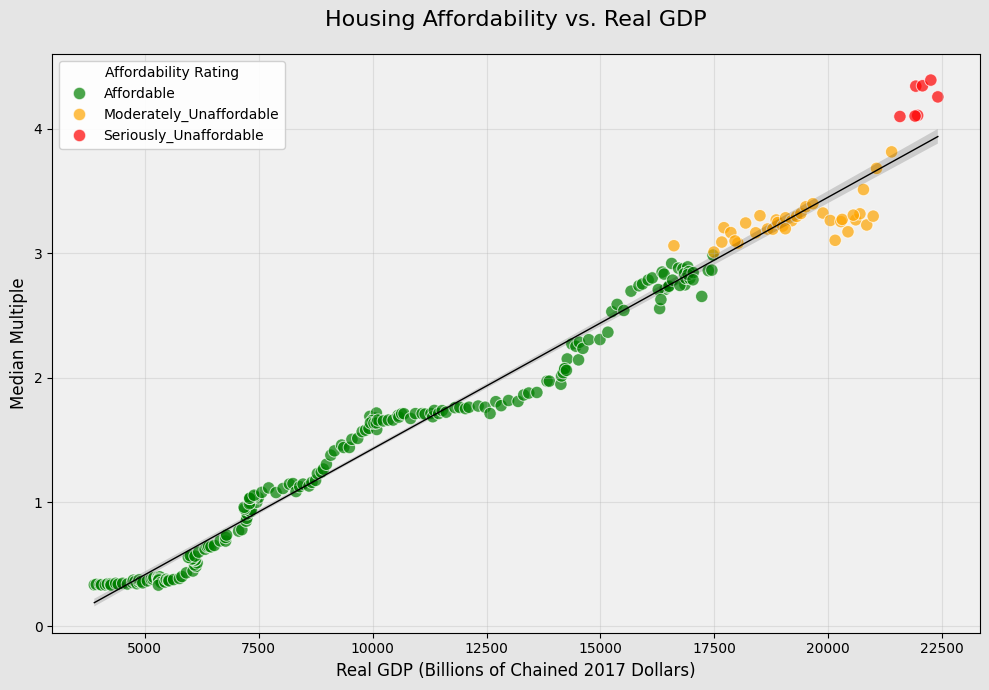

In [23]:
def plot_affordability_vs_gdp(df):
    fig, ax = plt.subplots(figsize=(10, 7), facecolor='#e5e5e5')
    ax.set_facecolor('#f0f0f0')
    
    sns.scatterplot(
        x="real_GDP",
        y="Median_Multiple",
        hue="Affordability_Rating",
        palette=colors,
        data=GDP_MM_Correlation_df,
        s=80,
        alpha=0.7,
        ax=ax
    )
    
    sns.regplot(
        x="real_GDP",
        y="Median_Multiple",
        data=df,
        scatter=False,
        line_kws={'color': 'black', 'linewidth': 1},
        ax=ax
    )
    
    ax.set_xlabel("Real GDP (Billions of Chained 2017 Dollars)", fontsize=12)
    ax.set_ylabel("Median Multiple", fontsize=12)
    ax.set_title("Housing Affordability vs. Real GDP", fontsize=16, pad=20)
    ax.legend(title="Affordability Rating", frameon=True, framealpha=0.9)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_affordability_vs_gdp(GDP_MM_Correlation_df)

Discussion of Linear Regression Analysis:

The regression analysis shows a highly significant relationship between the independent variable Real GDP and the dependent variable, the Median_Multiple. The model explains 98.1% of the variance in Median_Multiple based on R^2. The extremely low p-value confirms the statistical significance of the model.

Diagnostic Testing

The Durbin-Watson statistic is close to 2, suggesting no significant autocorrelation in the residuals.
The Omnibus and Jarque-Bera tests (p-values of 0.330 and 0.357 respectively) indicate the residuals are normally distributed.
The low condition number (1.00) suggests no multicollinearity issues.

There is increase variability in the Median Multiple around 20,000 X billion dollars as indicated in the above chart. Further analysis should be done to assess whether this trend continues and its implications.

This analysis should be reviewed and discussed by a subject matter expert. I am not a subject matter expert and am new to statistical analysis. 

That being said the model does suggest some troubling features regarding the GDP metric and raises questions about its prominence as a measure of health of the economy.

In [24]:
# Create an Affordability_Rating column for Dataframe with Year for second chart

df_merged_filtered['Affordability_Rating'] = pd.cut(
     df_merged_filtered['Median_Multiple'],
     bins=[0, 3.0, 4.0, float('inf')],
     labels=['Affordable', 'Moderately_Unaffordable', 'Seriously_Unaffordable'])

# note: this code leaves out higher levels of unaffordability classification 
# because they are not relevent to this analysis but it should be updated for additional/other data

/var/folders/4_/dbg0kzhn7354xv35_by_4slr0000gn/T/ipykernel_2575/3899915258.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_filtered['Affordability_Rating'] = pd.cut(


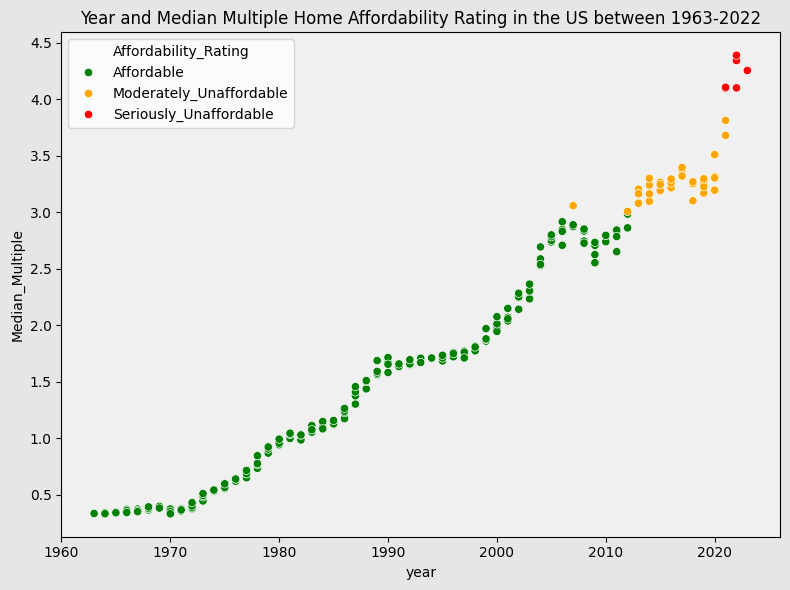

In [25]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Visualize home Median Multiple over time

# Define custom colors for Affordability Rating with correct category names
colors = {
    'Affordable': 'green',
    'Moderately_Unaffordable': 'orange',
    'Seriously_Unaffordable': 'red'   
}

# Create figure with gray background
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.set_facecolor('#f0f0f0')  # Light gray for plot area
fig.patch.set_facecolor('#e6e6e6')  # Slightly darker gray for figure

sns.scatterplot(
    data=df_merged_filtered, 
    x="year", 
    y="Median_Multiple", 
    hue="Affordability_Rating", 
    palette=colors
)

plt.title("Year and Median Multiple Home Affordability Rating in the US between 1963-2022")
plt.tight_layout()
plt.show()

This graph illustrates the Median Multiple and housing affordability rating trends over time. Following the 2008 Great Financial Crisis, a temporary improvement in affordability emerged, likely due to credit market constraints. This affordability increase may have predominantly benefited individuals with substantial liquid assets, as home lending was severely restricted— a phenomenon warranting further investigation beyond this analysis.

Around 2020, the Median Multiple exhibits a dramatic exponential increase. This sharp deterioration in affordability can likely be attributed to a combination of pandemic-related government stimulus programs and significant migration away from urban centers. This dangerous trend requires further analysis and corrective policy interventions to prevent long-term housing market instability and decreased sociatal cohesion.

In [26]:
# df_merged.head()
# df_merged_filtered.head()
GDP_MM_Correlation_df.head()

,Median_Multiple,real_GDP,Affordability_Rating
0,0.334524,3893.482,Affordable
1,0.338282,3937.183,Affordable
2,0.336403,4023.755,Affordable
3,0.334539,4050.147,Affordable
4,0.334539,4135.553,Affordable


Best parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Balanced accuracy: 0.9605
                         precision    recall  f1-score   support

             Affordable     0.9815    0.8983    0.9381        59
Moderately_Unaffordable     0.9077    0.9833    0.9440        60
 Seriously_Unaffordable     1.0000    1.0000    1.0000        60

               accuracy                         0.9609       179
              macro avg     0.9631    0.9605    0.9607       179
           weighted avg     0.9630    0.9609    0.9608       179



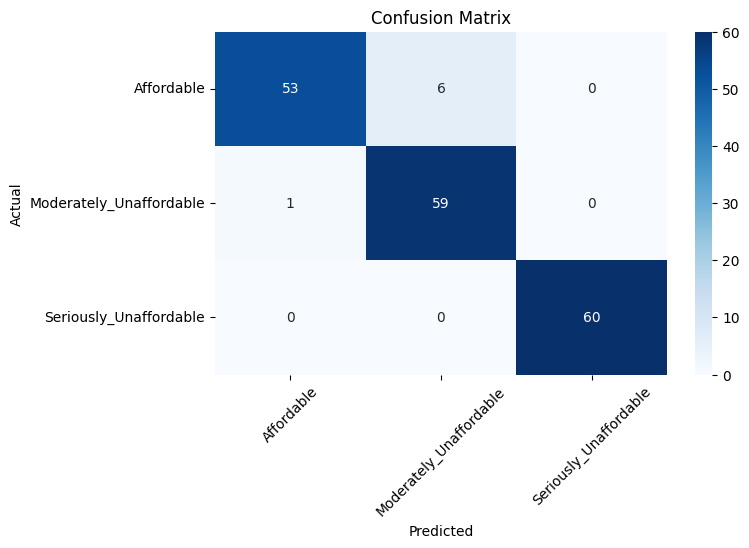

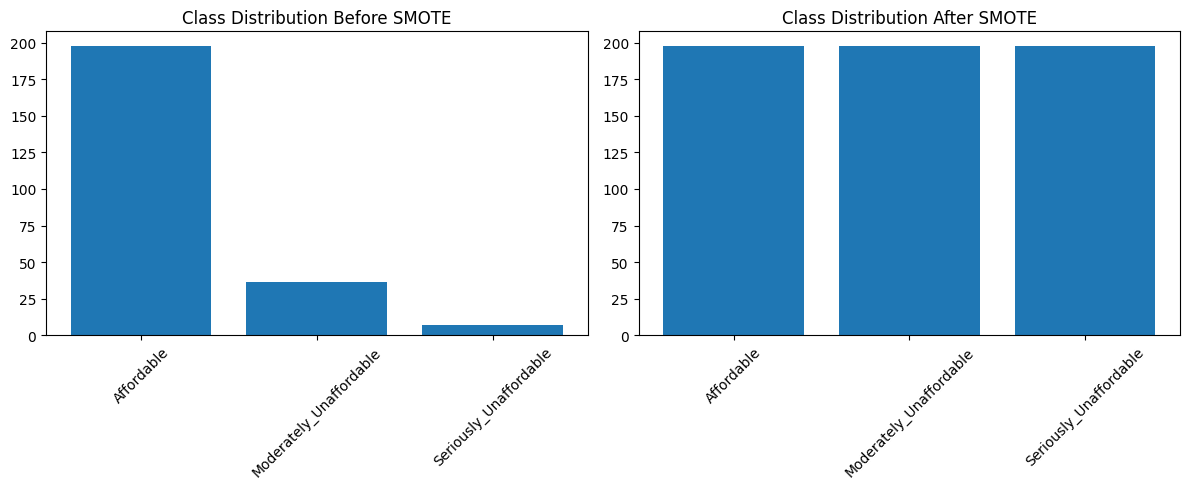

In [27]:
# Creation of a random forest classification model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


# Prepare features and target
X = GDP_MM_Correlation_df[["real_GDP"]]
y = GDP_MM_Correlation_df["Affordability_Rating"]

# Handle imbalanced classes with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

# Create and train model with more focused hyperparameter optimization
param_grid = {
    'n_estimators': [100, 200],  
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', None]
}

# Use more CPU cores if available
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='balanced_accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluate best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Balanced accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred, digits=4))


# Create confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


# Show distribution of classes before and after SMOTE
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
y_counts = GDP_MM_Correlation_df["Affordability_Rating"].value_counts()
plt.bar(y_counts.index, y_counts.values)
plt.title('Class Distribution Before SMOTE')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
y_resampled_counts = pd.Series(y_resampled).value_counts()
plt.bar(y_resampled_counts.index, y_resampled_counts.values)
plt.title('Class Distribution After SMOTE')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Random Forest Classification Results Analysis

Model Performance Summary

The Random Forest classification model achieved excellent results in predicting housing affordability categories based on GDP data. Using a SMOTE function to balance class distribution the model demonstrates strong predictive capabilities across all affordability classes.

Hyperparameter Configuration

The optimal model configuration identified through GridSearchCV includes:
- 100 decision trees in the ensemble
- No maximum depth restriction, allowing trees to grow to their full extent
- Minimum of 2 samples required to split an internal node
- Balanced class weighting to account for class imbalance in the original dataset

Classification Performance by Category

The model demonstrated consistent performance across all affordability categories:


Implications
 
The model can reliably identify timeframe likely to experience housing affordability challenges based solely on economic output data. This suggests reconsidering GDP growth as inherently positive for society and consideration of other metrics to improve societal cohesion.


Next Steps

This work should be reviewed with subject matter experts as I do not have subject matter expertise in this area. I am also not experienced with time series analysis and there may be additional considerations that I could have missed.
Geographic sub-analysis can and should be done to identify regional variations in the GDP-affordability and evaluate consistency.


Additional Unremarkable Analysis results:

I considered the following other input variables to create a multiple linear regression model:
Federal Funds Rate,
Consumer Price Index, and
Unemployment Rate

None of these features performed as well as real gdp with the exception of Consumer Price Index. This is a marker of inflation and indirectly includes home values by including rent paid and potential rent collected. 

The Brookings website states, "For rental properties, the BLS counts cash rent paid to the landlord for shelter and included utilities, plus any government subsidies paid to the landlord on the tenant’s behalf. If a unit is owner-occupied, the BLS computes what it would cost to rent that home in the current housing market, known as Owners’ Equivalent Rent (OER). Utilities paid by homeowners are measured separately in the CPI."

Further analysis and time is needed to discuss in more detail but I decided to leave the dataset out of the main analysis due to it being related to my dependant variable. It is a more expansive measure of inflation and supports similar conclusions regarding an affordability crisis yet is more abstact and therefore does not produce the same emotional response.

My descriptions and writing about these models will be limited due to time constaints but my work can be reviewed below.

In [28]:
# import Federal Funds Rate data
# Considerations: FFR is used to act upon the economy
# "Like the federal discount rate, the federal funds rate is used to 
# control the supply of available funds and hence, inflation and other interest rates."
# Source: https://www.bankrate.com/rates/interest-rates/federal-funds-rate/
# Consider the current observation date taking between 6-18 months to 
# impact the economy so may want to create a lag where this data
# is set backwords 6, 12, and 18 months
# This data is given at 1 month intervals and so will need to be
# changed to quarterly intervals and imputed

fed_funds_df = pd.read_csv('/Users/douglas/VS_Code/FEDFUNDS.csv')
income_df.info

# create a copy of raw data
fed_funds_df_copy = fed_funds_df

# Change object to datetime
fed_funds_df_copy['observation_date'] = pd.to_datetime(fed_funds_df_copy['observation_date'])

# rename column for better readability
fed_funds_df_copy = fed_funds_df_copy.rename(columns = {'FEDFUNDS': 'fed_funds_rate'})

# Filter the data to match the existing time interval
fed_funds_df_copy = fed_funds_df_copy[(fed_funds_df_copy['observation_date'] >= '1962-07-01') & (fed_funds_df_copy['observation_date'] <= '2023-01-01')]

# create quarterly intervals instead of yearly
rates_quarterly = fed_funds_df_copy.groupby(pd.Grouper(key='observation_date', freq="QS"))['fed_funds_rate'].mean()
fed_funds_df_copy = rates_quarterly.to_frame().reset_index()

# fed_funds_df_copy.head()

# Create lag dataframes
fed_funds_6m = fed_funds_df_copy.copy()
fed_funds_6m['observation_date'] = fed_funds_6m['observation_date'] - pd.DateOffset(months=6)
fed_funds_6m = fed_funds_6m.rename(columns={'fed_funds_rate': 'fed_funds_rate_6m'})

fed_funds_12m = fed_funds_df_copy.copy()
fed_funds_12m['observation_date'] = fed_funds_12m['observation_date'] - pd.DateOffset(months=12)
fed_funds_12m = fed_funds_12m.rename(columns={'fed_funds_rate': 'fed_funds_rate_12m'})

fed_funds_18m = fed_funds_df_copy.copy()
fed_funds_18m['observation_date'] = fed_funds_18m['observation_date'] - pd.DateOffset(months=18)
fed_funds_18m = fed_funds_18m.rename(columns={'fed_funds_rate': 'fed_funds_rate_18m'})

# Merge X2 data to use in multiple linear regression with subset selection.




In [29]:
# Troubleshoot the input variable to match number of records and proper dates

# fed_funds_18m.head     # 243 rows which does not match the 241 needed
# results of head function show start dates as follows
# bound method NDFrame.head of     observation_date  fed_funds_rate_18m
# 0         1961-01-01            2.846667             # incorrect start date - must trim to  1961-07-01
# 1          1961-04-01            2.923333
# 2         1961-07-01            2.966667


# Calculate the 18 month date prior to the first date in X1 data (GDP)
GDP_df_copy.head() # start date of 1963-01-01 
# check 18 months prior 
print(GDP_df_copy['observation_date'] - pd.DateOffset(months=18)) # first date should be 1961-07-01
# by trimming these first two dates off we will have a matching number of records
# fed_funds_18m['observation_date'] - pd.DateOffset(months=18)

fed_funds_18m = fed_funds_18m[(fed_funds_18m['observation_date'] >= '1961-07-01')]
# fed_funds_18m.head()
# fed_funds_18.count



64    1961-07-01
65    1961-10-01
66    1962-01-01
67    1962-04-01
68    1962-07-01
         ...    
300   2020-07-01
301   2020-10-01
302   2021-01-01
303   2021-04-01
304   2021-07-01
Name: observation_date, Length: 241, dtype: datetime64[ns]


In [30]:
# repeat above process with 6 and 12 month lags
# fed_funds_12m.head() # start date: 1961-07-01	

# calculate proper start dates
# print(GDP_df_copy['observation_date'] - pd.DateOffset(months=6)) # first date should be 1962-07-01
# print(GDP_df_copy['observation_date'] - pd.DateOffset(months=12)) # first date should be 1962-01-01

fed_funds_6m = fed_funds_6m[(fed_funds_6m['observation_date'] >= '1962-07-01')]
# fed_funds_6m.head() # verified correct start date
# fed_funds_6m.count() # verified correct count

fed_funds_12m = fed_funds_12m[(fed_funds_12m['observation_date'] >= '1962-01-01')]
# fed_funds_12m.head() # verified correct start date
# fed_funds_12m.count() # verified correct count



In [31]:
fed_funds_6m = fed_funds_6m[(fed_funds_6m['observation_date'] >= '1962-07-01')]
# fed_funds_6m.head() # verified correct start date
fed_funds_18m.count() # verified correct count

observation_date      241
fed_funds_rate_18m    241
dtype: int64

In [32]:
# Create X_subset_fed_funds_lag as a DataFrame
X_subset_fed_funds_lag = pd.DataFrame({
    'fed_funds_rate_6m': fed_funds_6m['fed_funds_rate_6m'],
    'fed_funds_rate_12m': fed_funds_12m['fed_funds_rate_12m'],
    'fed_funds_rate_18m': fed_funds_18m['fed_funds_rate_18m']
})

# Create Y_fed_funds
Y_fed_funds = df_merged["Median_Multiple"]

# Check if lengths match
if len(Y_fed_funds) != len(X_subset_fed_funds_lag):
    raise ValueError("Length of Y_fed_funds does not match length of X_subset_fed_funds_lag.")

# Reset indices for X and Y
X_subset_fed_funds_lag = X_subset_fed_funds_lag.reset_index(drop=True)
Y_fed_funds = Y_fed_funds.reset_index(drop=True)


In [33]:
import statsmodels.api as sm

# List of predictors
predictors = ['fed_funds_rate_6m', 'fed_funds_rate_12m', 'fed_funds_rate_18m']

# Dictionary to store results
results = {}

# Fit models for each predictor
for predictor in predictors:
    X = sm.add_constant(X_subset_fed_funds_lag[predictor])  # Add intercept
    model = sm.OLS(Y_fed_funds, X).fit()
    results[predictor] = {
        'R-squared': model.rsquared,
        'Adjusted R-squared': model.rsquared_adj,
        'AIC': model.aic
    }

# Print results
for predictor, metrics in results.items():
    print(f"Predictor: {predictor}")
    print(f"  R-squared: {metrics['R-squared']:.4f}")
    print(f"  Adjusted R-squared: {metrics['Adjusted R-squared']:.4f}")
    print(f"  AIC: {metrics['AIC']:.4f}")
    print()

# Find the best predictor based on adjusted R-squared
best_predictor = max(results, key=lambda x: results[x]['Adjusted R-squared'])
print(f"Best predictor: {best_predictor}")

Predictor: fed_funds_rate_6m
  R-squared: 0.3922
  Adjusted R-squared: 0.3897
  AIC: 612.3328

Predictor: fed_funds_rate_12m
  R-squared: 0.3922
  Adjusted R-squared: 0.3897
  AIC: 612.3328

Predictor: fed_funds_rate_18m
  R-squared: 0.3922
  Adjusted R-squared: 0.3897
  AIC: 612.3328

Best predictor: fed_funds_rate_6m


In [34]:
print(X_subset_fed_funds_lag.corr())

                    fed_funds_rate_6m  fed_funds_rate_12m  fed_funds_rate_18m
fed_funds_rate_6m                 1.0                 1.0                 1.0
fed_funds_rate_12m                1.0                 1.0                 1.0
fed_funds_rate_18m                1.0                 1.0                 1.0


There is no benefit to developing this staggered time lag. The R-squared does not warrent further investigation.

In [35]:
# import Consumer Price Index for All Urban Consumers: All Items in U.S. City Average
# This data indirectly includes information on the cost of housing.
# There may be issues with using it as a predictor of MM due to this

X3_df = pd.read_csv('/Users/douglas/VS_Code/CPIAUCSL.csv')


# create a copy of raw data
X3_df_copy = X3_df

X3_df_copy.head()
X3_df_copy.describe()

# Change object to datetime
X3_df_copy['observation_date'] = pd.to_datetime(X3_df_copy['observation_date'])

# rename column for better readability
X3_df_copy = X3_df_copy.rename(columns = {'CPIAUCSL': 'consumer_price_index'})

# create quarterly intervals instead of yearly
cpi_quarterly = X3_df_copy.groupby(pd.Grouper(key='observation_date', freq="QS"))['consumer_price_index'].mean()
X3_df_copy = cpi_quarterly.to_frame().reset_index()

# Filter the data to match the existing time interval
X3_df_copy = X3_df_copy[(X3_df_copy['observation_date'] >= '1963-01-01') & (X3_df_copy['observation_date'] <= '2023-01-01')]
# X3_df_copy.head()



In [36]:
import statsmodels.api as sm

# Select the predictor
predictor = X3_df_copy

# Prepare the data
X = sm.add_constant(X3_df_copy['consumer_price_index'])  # Add intercept
# Create Y
Y = df_merged["Median_Multiple"]

# Reset indices for X and Y
X = X.reset_index(drop=True)
Y = Y.reset_index(drop=True)

# Fit the model
model = sm.OLS(Y, X).fit()

# Print model summary
print(model.summary())

# Extract key metrics
r_squared = model.rsquared
adjusted_r_squared = model.rsquared_adj
aic = model.aic

print(f"R-squared: {r_squared:.4f}")
print(f"Adjusted R-squared: {adjusted_r_squared:.4f}")
print(f"AIC: {aic:.4f}")

                            OLS Regression Results                            
Dep. Variable:        Median_Multiple   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 1.239e+04
Date:                Fri, 07 Mar 2025   Prob (F-statistic):          6.90e-208
Time:                        21:08:24   Log-Likelihood:                 113.85
No. Observations:                 241   AIC:                            -223.7
Df Residuals:                     239   BIC:                            -216.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2105 

Pretty impressive result but related to Median Multiple and so I will not explore further.

In [37]:
# import US Unemployment Rate data
# This data is monthly and needs to be changed to Quarterly and imputed.


X4_df = pd.read_csv('/Users/douglas/VS_Code/UNRATE.csv')
income_df.info

# create a copy of raw data
X4_df_copy = X4_df

# X4_df_copy.head()
# X4_df_copy.describe()

# Change object to datetime
X4_df_copy['observation_date'] = pd.to_datetime(X4_df_copy['observation_date'])

# rename column for better readability
X4_df_copy = X4_df_copy.rename(columns = {'UNRATE': 'unemployment_rate'})

# create quarterly intervals instead of yearly
unemployement_quarterly = X4_df_copy.groupby(pd.Grouper(key='observation_date', freq="QS"))['unemployment_rate'].mean()
X4_df_copy = unemployement_quarterly.to_frame().reset_index()

# Filter the data to match the existing time interval
X4_df_copy = X4_df_copy[(X4_df_copy['observation_date'] >= '1963-01-01') & (X4_df_copy['observation_date'] <= '2023-01-01')]
X4_df_copy.count()


observation_date     241
unemployment_rate    241
dtype: int64

In [38]:
import statsmodels.api as sm

# Select the predictor
predictor = X4_df_copy

# Prepare the data
X = sm.add_constant(X4_df_copy['unemployment_rate'])  # Add intercept
# Create Y
Y = df_merged["Median_Multiple"]

# Reset indices for X and Y
X = X.reset_index(drop=True)
Y = Y.reset_index(drop=True)

# Fit the model
model = sm.OLS(Y, X).fit()

# Print model summary
print(model.summary())

# Extract key metrics
r_squared = model.rsquared
adjusted_r_squared = model.rsquared_adj
aic = model.aic

print(f"R-squared: {r_squared:.4f}")
print(f"Adjusted R-squared: {adjusted_r_squared:.4f}")
print(f"AIC: {aic:.4f}")

                            OLS Regression Results                            
Dep. Variable:        Median_Multiple   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.3881
Date:                Fri, 07 Mar 2025   Prob (F-statistic):              0.534
Time:                        21:08:24   Log-Likelihood:                -363.97
No. Observations:                 241   AIC:                             731.9
Df Residuals:                     239   BIC:                             738.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.9207      0.25

Discussion regarding unemployement rate:

Unemployement rate offers no predictive insight on housing affordability. 
This may be a relevent consideration regarding the effectiveness of interest rate hikes to contol inflation in the sphere of home affordability.

Conclusion:

Real GDP has a suprisingly strong relationship to home affordability or lack there of as evidenced by my analysis using the Median Multiple in both Linear Regression and classification with a Decision tree. Of the two the Decision Tree is more interesting due to the classification. The very high accuracy score may be due to its nonparametric nature. While the linear relationship is very strong, there is some evidence to suggest that an optimal model may require less bias. 

This relationship warrents futher investigation and input from subject matter experts. Exploring the generalizability of the relationship to other timeframes and geographical locations is recommended. 

One could argue that until about 2010 the relationship did not matter as housing was within the realm of affordability for the majority of the population. I would argue that even then it predicts a concerning trend that should have been given more attention.

The results suggest that GDP as a predictor of economic health has severe limitations and that new models should be adopted. It informs the current political fragility within what is often refered to as the Liberal World Order and suggests the need for deep introspection and re-evaluation of foundational presumptions about economic freedom. In the absence of wisdom constraints on freedom may arise as a consequence of the results of that freedom.

On a personal level one expects that when one increases productive output they get a better result. When we clean our car or mow the lawn we see improvement. If our primary measure of economic production does not produce results we want as a society we should swiftly evaluate its merits. The chart showing the increasing median multiple over time looks dire and is obviously related to the major geopolitical shifts occuring in the world today.

Sources:

Nasiha Salwati, D. W., Tyler Powell, D. W., Michael Ng, D. W., Elaine Kamarck, W. A. G., & Alan J. Auerbach, W. G. G. (2024, January 31). How does the consumer price index account for the cost of housing?. Brookings. https://www.brookings.edu/articles/how-does-the-consumer-price-index-account-for-the-cost-of-housing/ 

Callen, T. (2008, December). Back to basics: What is gross domestic product?. imf.org. https://www.imf.org/external/pubs/ft/fandd/2008/12/pdf/basics.pdf 

COX, W. (2024). Demographia International Housing Affordability – 2024 edition released. Demographia International Housing Affordability – 2024 Edition Released | Newgeography.com. https://www.newgeography.com/content/008198-demographia-international-housing-affordability-2024-edition-released 

Grossman, D. (2024, September 10). Where you live may dictate whether you’re middle-class. Scripps News. https://www.scrippsnews.com/life/money/mastering-your-money/where-you-live-may-dictate-whether-youre-middle-class 

Galston, W. A. (2020, July). The enduring vulnerability of Liberal Democracy. Journal of Democracy. https://www.journalofdemocracy.org/articles/the-enduring-vulnerability-of-liberal-democracy/ 

Stobierski, T. (2021, June 8). What is GDP & why is it important?. Business Insights Blog. https://online.hbs.edu/blog/post/why-is-gdp-important 

Galston, W. A. (2020, July). The enduring vulnerability of Liberal Democracy. Journal of Democracy. https://www.journalofdemocracy.org/articles/the-enduring-vulnerability-of-liberal-democracy/ 


Datasets:

Y =
median multiple:
MM equation = medium_homeprice / median_income
= [
Median Home Price Data:
source: https://fred.stlouisfed.org/series/MSPUS
Quarterly since 1963 - 2024-10-01
FileName: 1963-01-01_Med_Home_Price
/
Real Median Family Income in the United States data source:
source: https://fred.stlouisfed.org/series/MEFAINUSA672N#
date range...yearly 1953-2023-01-01
FileName: MedianUS_income1953
]

X1 
Data for...
Real Gross Domestic Product 
Source: https://fred.stlouisfed.org/series/GDPC1#
Saved as...GDPC2
date range...1947-01-01 - 2024-10-01
Units: Billions of Chained 2017 Dollars | Quarterly

X2 (exploratory)
Data for... 
Federal Funds Rate
Source: https://fred.stlouisfed.org/series/FEDFUNDS
date range: Monthly 1954-07-01 - 2025-02-01
Name: FEDFUNDS
Units: Percent | Monthly
more info: https://www.bankrate.com/rates/interest-rates/federal-funds-rate/

X3 (exploratory)
Data for...
Consumer Price Index for All Urban Consumers: All Items in U.S. City Average (CPIAUCSL)
Source: https://fred.stlouisfed.org/series/CPIAUCSL
date range: monthly 1947-01-01 - 2025
file name: CPIAUCSL

X4 (exploratory)
Data for 
US Unemployment Rate
Source: https://fred.stlouisfed.org/series/UNRATE/
date range: 1948-2025
File Name: UNRATE.csv
Units: Percent, Seasonally Adjusted


